<font size=6>Data classification using K-Nearest Neighbor Classifier</font>

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

In [3]:
data=pd.read_csv('pima-indians-diabetes.csv')
data.head()


,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregs    768 non-null int64
plas     768 non-null int64
pres     768 non-null int64
skin     768 non-null int64
test     768 non-null int64
BMI      768 non-null float64
pedi     768 non-null float64
Age      768 non-null int64
class    768 non-null int64
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [5]:
print(data.shape)
#check if there is any null value
print(data.isnull().values.any())

(768, 9)
False


In [10]:
data.isnull().values.any()

False

In [11]:
corrmat = data.corr()

In [12]:
# corrmat
top_corr_features = corrmat.index
top_corr_features

Index(['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age', 'class'], dtype='object')

In [13]:
corrmat

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
pregs,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341,0.221898
plas,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514,0.466581
pres,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528,0.065068
skin,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970,0.074752
test,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163,0.130548
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242,0.292695
pedi,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561,0.173844
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000,0.238356
class,0.221898,0.466581,0.065068,0.074752,0.130548,0.292695,0.173844,0.238356,1.000000


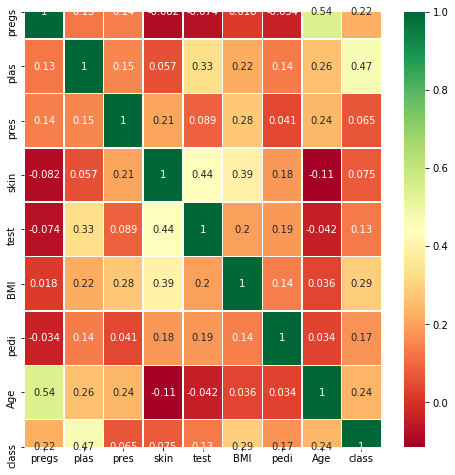

In [35]:
## Correlation
#get correlations of each features in dataset
corrmat = data.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(8,8))
#plot heat map
g=sns.heatmap(corrmat,annot=True,cmap="RdYlGn",linewidth=0.5)

In [36]:
diabetes_true_count = len(data.loc[data['class'] == 0])
diabetes_false_count = len(data.loc[data['class'] == 1])
print("Number of people with diabetes: ",diabetes_true_count)
print("Number of people with diabetes: ",diabetes_false_count)

Number of people with diabetes:  500
Number of people with diabetes:  268


In [42]:
feature_columns=list(data.columns[0:8])
target_column=data.columns[-1]
print("feature_columns=>",feature_columns)
print("target_column=>",[target_column])

feature_columns=> ['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age']
target_column=> ['class']


In [43]:
feature_df=data.drop('class',axis=1)
feature_df.head()
# data.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


1. Write a python program to


a. __Normalize all the attributes__, <font color='red'>except class attribute</font>, of pima-indians-diabetes.csv using __min-max normalization__ to transform the data in the range [0-1]. Save the file as pima-indians-diabetes-Normalised.csv

![title](scale_why.png)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
df_norm=pd.DataFrame(scaler.fit_transform(feature_df),columns=data.columns[0:8])

In [19]:
norm_df=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)

In [21]:
norm_df['class']=data['class']

In [23]:
norm_df.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [22]:
df_norm.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000


In [30]:
df_norm['class']=data['class']
df_norm.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,0.352941,0.743719,0.590164,0.353535,0.000000,0.500745,0.234415,0.483333,1
1,0.058824,0.427136,0.540984,0.292929,0.000000,0.396423,0.116567,0.166667,0
2,0.470588,0.919598,0.524590,0.000000,0.000000,0.347243,0.253629,0.183333,1
3,0.058824,0.447236,0.540984,0.232323,0.111111,0.418778,0.038002,0.000000,0
4,0.000000,0.688442,0.327869,0.353535,0.198582,0.642325,0.943638,0.200000,1


In [42]:
df_norm.to_csv('pima-indians-diabetes-Normalised.csv')

b. __Standardize, all the attributes__, <font color='red'>except class attribute</font>, of pima-indians-diabetes.csv using __z-normalization__. Save the file as pima-indians-diabetes-Standardised.csv

In [25]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
df_standard=pd.DataFrame(scaler.fit_transform(feature_df),columns=data.columns[0:8])
df_standard['class']=data['class']
df_standard.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [27]:
std_df=pd.DataFrame(scaler.fit_transform(data),columns=data.columns)
std_df['class']=data['class']

In [28]:
std_df.head()

,pregs,plas,pres,skin,test,BMI,pedi,Age,class
0,0.639947,0.848324,0.149641,0.907270,-0.692891,0.204013,0.468492,1.425995,1
1,-0.844885,-1.123396,-0.160546,0.530902,-0.692891,-0.684422,-0.365061,-0.190672,0
2,1.233880,1.943724,-0.263941,-1.288212,-0.692891,-1.103255,0.604397,-0.105584,1
3,-0.844885,-0.998208,-0.160546,0.154533,0.123302,-0.494043,-0.920763,-1.041549,0
4,-1.141852,0.504055,-1.504687,0.907270,0.765836,1.409746,5.484909,-0.020496,1


In [44]:
df_standard.to_csv('pima-indians-diabetes-Standardised.csv')

2 . __Split the data of <font color='red'>each class</font> from pima-indians-diabetes-Normalised.csv into train data and test data.__ Train data should contain same 70% of tuples in Question 2 from each of the class and test data contain remaining same 30% of tuples from each class. <font color='green'>Save the __train__ data as __diabetes-train-normalise.csv__ and save the __test__ data as __diabetes-test-normalise.csv__</font>

In [45]:
df_norm.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
pregs    768 non-null float64
plas     768 non-null float64
pres     768 non-null float64
skin     768 non-null float64
test     768 non-null float64
BMI      768 non-null float64
pedi     768 non-null float64
Age      768 non-null float64
class    768 non-null int64
dtypes: float64(8), int64(1)
memory usage: 54.0 KB


The __stratify__ parameter comes into handy <font color='red'>so that the __proportion of values__ in the __sample produced__ in our test group will be the same as the proportion of values provided to parameter stratify.</font> This results __especially useful when working around classification problems__, since if we don’t provide this parameter with an array-like object, we may end with a non-representative distribution of our target classes in our test group.
Usually, this parameter is used by passing the target variable like this:


__X_train, X_test, y_train, y_test = train_test_split(your_data, y, test_size=0.2, stratify=y, random_state=123, shuffle=True)__

In [38]:
X=df_norm.iloc[:,0:-1].values
y=df_norm['class'].values

# Import  module
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,stratify=y, random_state=42,shuffle=True)

print("Shape of Original Dataframe=>",df_norm.shape)
print("Shape of feature training data=> ",X_train.shape)
print("Shape of target training data=> ",X_test.shape)
print("Shape of feature testing data=> ",y_train.shbape)
print("Shape of target testing data=> ",y_test.shape)

Shape of Original Dataframe=> (768, 9)
Shape of feature training data=>  (537, 8)
Shape of target training data=>  (231, 8)
Shape of feature testing data=>  (537,)
Shape of target testing data=>  (231,)


__This stratify parameter makes a split so that the proportion of values in the sample produced will be the same as the proportion of values provided to parameter stratify.__

In [44]:
feature_columns

['pregs', 'plas', 'pres', 'skin', 'test', 'BMI', 'pedi', 'Age']

In [45]:
train_data=pd.DataFrame(X_train,columns=feature_columns)
train_data['class']=y_train
train_data.head()
train_data.to_csv("diabetes-train-normalise.csv")

In [46]:
test_data=pd.DataFrame(X_test,columns=feature_columns) 
test_data['class']=y_test
test_data.head()
test_data.to_csv("diabetes-test-normalise.csv")

In [47]:
from sklearn.neighbors import KNeighborsClassifier
# Create a k-NN classifier with 7 neighbors: knn
knn = KNeighborsClassifier(n_neighbors=7)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))
# Predicted classes
y_pred = knn.predict(X_test)
# print("Test set predictions:\n {}".format(y_pred))

0.7056277056277056


In [48]:
y_pred

array([0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0], dtype=int64)

In [51]:
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21]
print(list(enumerate(neighbors)))
#Enumerate() method adds a counter to an iterable and returns it in a form of enumerate object. This enumerate object can then be used directly in for loops or be converted into a list of tuples using list() method.

[(0, 1), (1, 3), (2, 5), (3, 7), (4, 9), (5, 11), (6, 13), (7, 15), (8, 17), (9, 21)]


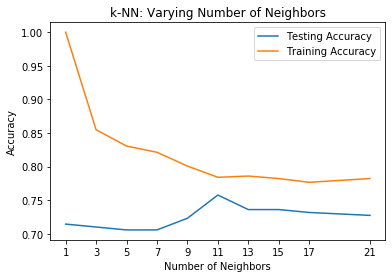

In [54]:
# Setup arrays to store train and test accuracies
train_accuracy_norm = np.empty(len(neighbors))#initialising  array of required size with random values
test_accuracy_norm = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy_norm[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy_norm[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.xticks(neighbors)
plt.plot(neighbors, test_accuracy_norm, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy_norm, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

__Hyperparameter tuning__


● Linear regression: Choosing parameters

● Ridge/lasso regression: Choosing alpha

● k-Nearest Neighbors: Choosing n_neighbors

● Parameters like alpha and k: Hyperparameters

● Hyperparameters cannot be learned by fittiing the model

__Choosing the correct hyperparameter__

● Try a bunch of different hyperparameter values

● Fit all of them separately

● See how well each performs

● Choose the best performing one

● It is essential to use cross-validation

In [55]:
from sklearn.model_selection import GridSearchCV
param_grid = {'n_neighbors': np.arange(1, 22,2)}
knn = KNeighborsClassifier()
knn_cv = GridSearchCV(knn, param_grid, cv=5)
knn_cv.fit(X, y)
print(knn_cv.best_params_)
print(round(knn_cv.best_score_,3))

{'n_neighbors': 15}
0.764


In [57]:
type(param_grid)

dict

__Hold-out set for final evaluation__

<font color='red'>Hold-out set reasoning ==></font>
- How well can the model perform on never before seen data?
- Using ALL data for cross-validation is not ideal
- Split data into training and hold-out set at the beginning
- Perform grid search cross-validation on training set
- Choose best hyperparameters and evaluate on hold-out set

In [52]:
# Import the necessary modules
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import classification_report
# Setup the pipeline
steps = [('scaler', StandardScaler()),
         ('knn',KNeighborsClassifier())]

pipeline = Pipeline(steps)

# Specify the hyperparameter space
param_grid = {'knn__n_neighbors':np.arange(1, 22,2)}
# Create train and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42,stratify=y)

# Instantiate the GridSearchCV object: cv
knn_cv = GridSearchCV(pipeline,param_grid,cv=5)

# Fit to the training set
knn_cv.fit(X_train,y_train)

# Predict the labels of the test set: y_pred
y_pred = knn_cv.predict(X_test)

# Compute and print metrics
print("Accuracy: {}".format(knn_cv.score(X_test, y_test)))
print(classification_report(y_test, y_pred))
print("Tuned Model Parameters: {}".format(knn_cv.best_params_))


Accuracy: 0.7575757575757576
              precision    recall  f1-score   support

           0       0.76      0.91      0.83       150
           1       0.74      0.48      0.58        81

    accuracy                           0.76       231
   macro avg       0.75      0.69      0.71       231
weighted avg       0.75      0.76      0.74       231

Tuned Model Parameters: {'knn__n_neighbors': 21}


__For standardized file__

In [58]:
X=df_standard.iloc[:,0:-1].values
y=df_standard['class'].values

# Import  module
from sklearn.model_selection import train_test_split
# Create training and test sets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.3,stratify=y, random_state=42,shuffle=True)

print("Shape of Original Dataframe=>",df_norm.shape)
print("Shape of feature training data=> ",X_train.shape)
print("Shape of target training data=> ",X_test.shape)
print("Shape of feature testing data=> ",y_train.shape)
print("Shape of target testing data=> ",y_test.shape)

Shape of Original Dataframe=> (768, 9)
Shape of feature training data=>  (537, 8)
Shape of target training data=>  (231, 8)
Shape of feature testing data=>  (537,)
Shape of target testing data=>  (231,)


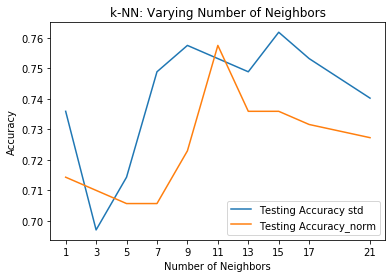

In [59]:
# Setup arrays to store train and test accuracies
neighbors = [1, 3, 5, 7, 9, 11, 13, 15, 17, 21]

train_accuracy_std = np.empty(len(neighbors))
test_accuracy_std = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train,y_train)
    
    #Compute accuracy on the training set
    train_accuracy_std[i] = knn.score(X_train, y_train)

    #Compute accuracy on the testing set
    test_accuracy_std[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.xticks(neighbors)
plt.plot(neighbors, test_accuracy_std, label = 'Testing Accuracy std')
plt.plot(neighbors, test_accuracy_norm, label = 'Testing Accuracy_norm')

# plt.plot(neighbors, train_accuracy_std, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()

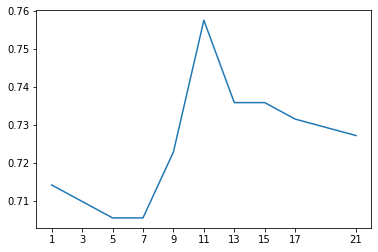

In [61]:

# plt.plot(neighbors, test_accuracy_std, label = 'Testing Accuracy std')
plt.xticks(neighbors)
plt.plot(neighbors, test_accuracy_norm, label = 'Testing Accuracy_norm')
plt.show()